### importing the libraries

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

Get the csv data from different months into one csv

In [28]:
path = '../SalesAnalysis/Sales_Data/'
df = pd.read_csv(path+'Sales_July_2019.csv');
files = [file for file in os.listdir(path)]
csvs = []
for i in files:
    csvs.append(pd.read_csv(path+i))
all_month_data = pd.concat(csvs)
all_month_data.to_csv('all_month_data.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


### Reading the newly created csv file

In [32]:
all_data = pd.read_csv('all_month_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [38]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [55]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

# removing all the data with null values
all_data = all_data.dropna(how = 'all')

### Converting the month column type from string to int

Finding the data with 'Or' in the month column and removing them

In [62]:
#all_data[all_data['month'] == 'Or'].count()
all_data = all_data[all_data['month'] != 'Or']
all_data['month'] = all_data['month'].astype('int')

In [63]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
month               185950 non-null int32
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


### Lets add another column "sales" which is equals to the "quantity" * "price each"

In [66]:
#make the type to int for multiplication
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## QUESTION 1: In which month the sale was the maximum
How much was earned that month?

In [74]:
all_data.groupby('month').sum()

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [100]:
maxSale = max(all_data.groupby('month').sum())
print(maxSale)
result = all_data.groupby('month').sum()
all_data.get('sales').describe()

sales


count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: sales, dtype: float64

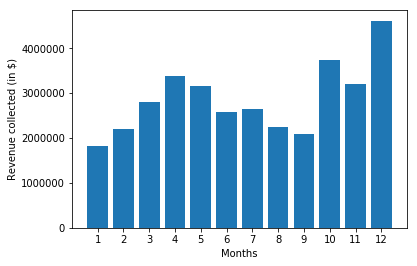

In [95]:
month = list(range(1,13))
plt.bar(month, result['sales'])
plt.xlabel('Months')
plt.ylabel('Revenue collected (in $)')
plt.xticks(month)


plt.show()

## QUESTION 2: which city has purchased the most

#### augment a city column in our data set

In [99]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
